<h2 style='text-align:center;font-size:80px;background-color:red;border:80px;color:white'>   Census Income Project . <h2>

# Problem Statement

### This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over  $50K a year.

# Description of fnlwgt (final weight) :-

### The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:


- **`1. A single cell estimate of the population 16+ for each state.`**

- **`2. Controls for Hispanic Origin by age and sex.`**

- **`3. Controls by Race, age and sex.`**

### We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


## ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file from dataset
df = pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### This dataset contain 32560 rows and 15 columns ,The dataset contains the details of the annual income of the persons. .Here the icome column is the target variable

In [152]:
df.head()

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,50,9,13,0,3,0,4,1,13,0
1,38,11,9,2,5,1,4,1,40,0
2,53,1,7,0,5,0,2,1,40,0
3,28,9,13,0,9,5,2,0,40,0
4,37,12,14,0,3,5,4,0,40,0


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
12577,31,Private,213643,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,3908,0,40,United-States,<=50K
27376,40,Self-emp-not-inc,89413,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1672,40,United-States,<=50K
29498,36,Private,188972,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
17417,35,Private,224889,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
16683,40,Private,123306,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K


#### So here many column have nan value where as target variable is having two class which means it is a `classification problem`

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

#### Dataset have both int64 and object column... where max of the column are object... which we will encode later..

<h2 style='text-align:center;font-size:50px;background-color:white;border:50px;color:green'> EDA <h2>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Here we get the Information regarding Column,Non-Null Count(columns having NaN Values) ,Dtypes and Memory usage of the dataset ..We can notice one thing too that here it is showing that there are Columns having Null values ,which is present in the dataset as ? .. These are Null Values and should be replaced according

# Lets check null value

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#### So dataset have null value but it is showing no null because null values is present as ? in dataset..

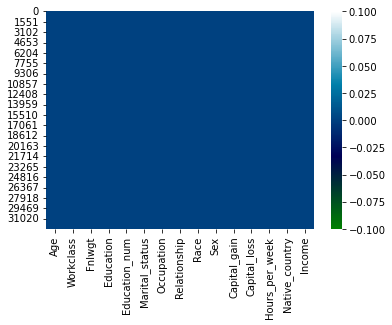

In [10]:
# Let's visualize NaN values
sns.heatmap(df.isnull(),cmap="ocean")
plt.show()

### Now Lets see the value counts of the columns ,so that we can check which column is having ? (NaN)

In [11]:
# Value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175


## Workclass,Occupation,Native_country columns have NaN values(?) and need to be replaced

### We will replace the NaN Values with the most frequest as all the columns are catagorical


In [12]:
df['Workclass'].mode()

0     Private
Name: Workclass, dtype: object

In [13]:
df['Occupation'].mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [14]:
df['Native_country'].mode()

0     United-States
Name: Native_country, dtype: object

### Now lets replace ?

In [15]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')

df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')

df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

### Lets check ? replaced or not

In [16]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

#### so here ? havebeen removed

In [17]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

#### so here ? havebeen removed

In [18]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

#### so here ? havebeen removed

## Now all NaN has been removed

In [19]:
#Lets check the Unique Values in each columns
df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

In [20]:
# Lets Check again Income Value Count
df['Income'].value_counts()


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

#### Its a classification problem as there are only 2 classes inside Income.....1st of all we will balance the dataset dataset as it is imbalanced by Using SMOTE.. And as i concluded earlier it have 2 classes which is more than 50k and less than 50k


<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:green'> A. Univariate Analysis <h2>

In [21]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

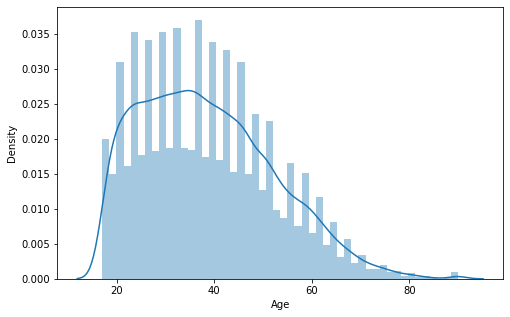

In [22]:
plt.figure(figsize=(8,5))
sns.distplot(df['Age'])

In [23]:
df['Age'].mean()

38.581633906633904

In [24]:
df['Age'].min()

17

In [25]:
df['Age'].max()

90

#### here we can conclude that the average aged people are from 38-39 year and we can acknowledge the same through the graph above


#### The minimum age of the people is 17 and max age people is 90

<AxesSubplot:xlabel='Workclass', ylabel='count'>

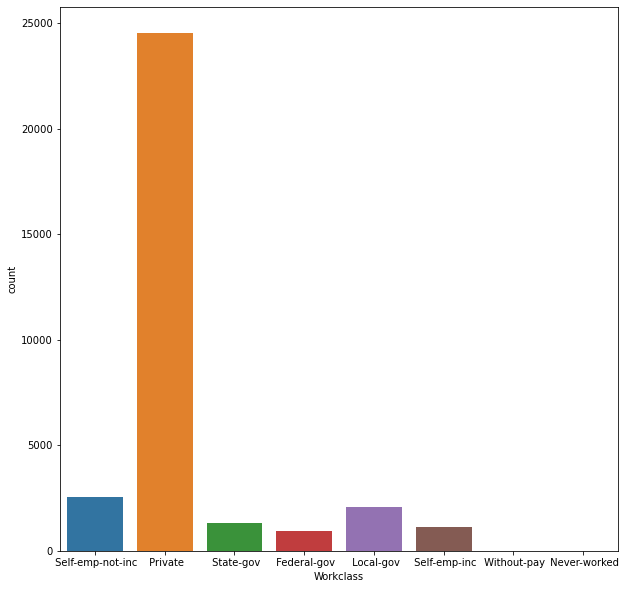

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(df['Workclass'])

#### maximum people who contributed to census income where from private sector and min or least contribution were from without pay and never worked

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

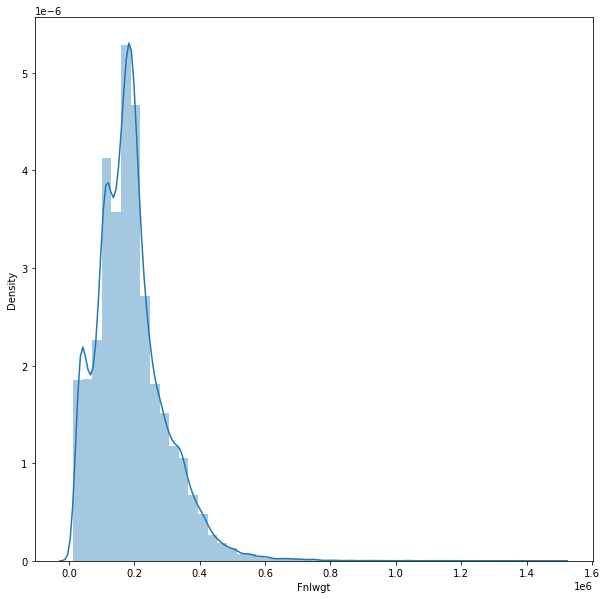

In [27]:
plt.figure(figsize=(10,10))
sns.distplot(df['Fnlwgt'])

#### Fnlwgt is skewed 

<function matplotlib.pyplot.show(close=None, block=None)>

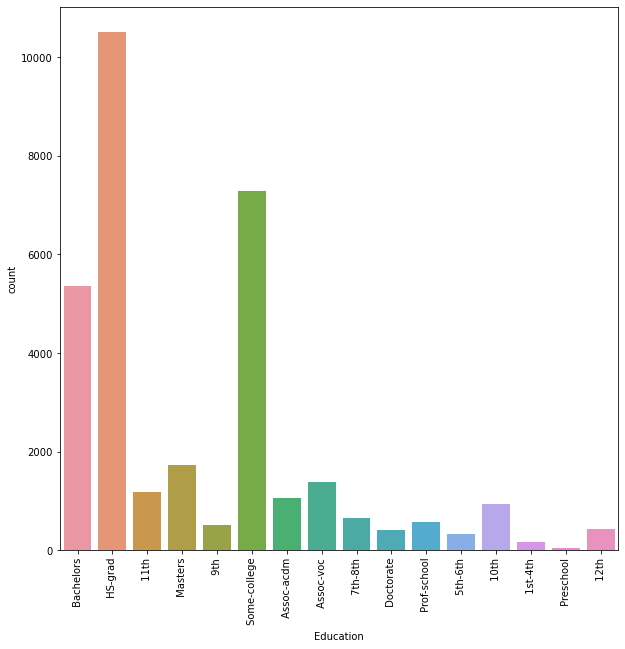

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show

#### maximum educated people who contributed to census income were HS grad and from Some college and Bachelors least educated where from Preschool and 1st-4th

<function matplotlib.pyplot.show(close=None, block=None)>

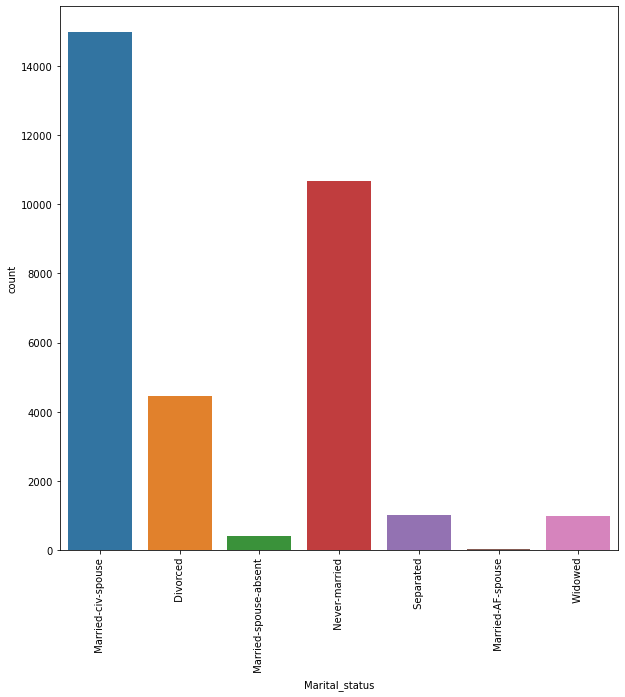

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show

#### Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.

#### Married-spouse-absent -> Married people living apart because either the husband or wife was employed and living at a considerable distance from home, was serving away from home in the Armed Forces

### Lets group them in married,seprated and single classes inside marital_status

In [31]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse',' Married-spouse-absent'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated'],'Separated')


<function matplotlib.pyplot.show(close=None, block=None)>

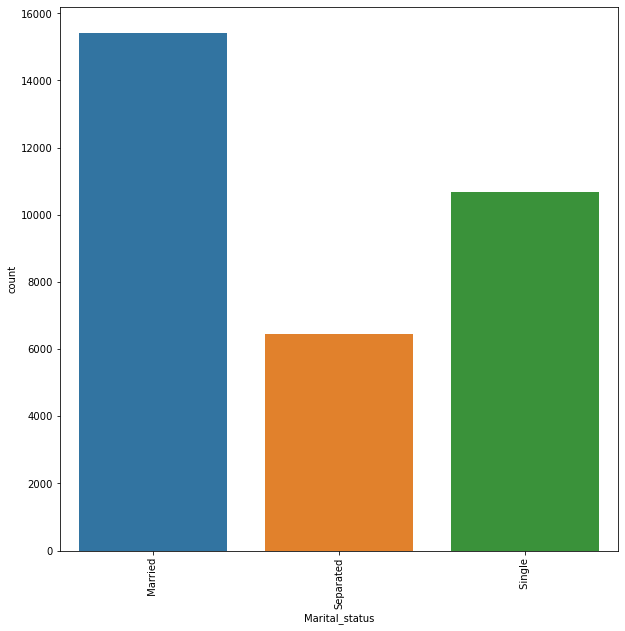

In [32]:
### Now lets plot again

plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show

#### max people who contributed to census income where married and minimum were seprated

<function matplotlib.pyplot.show(close=None, block=None)>

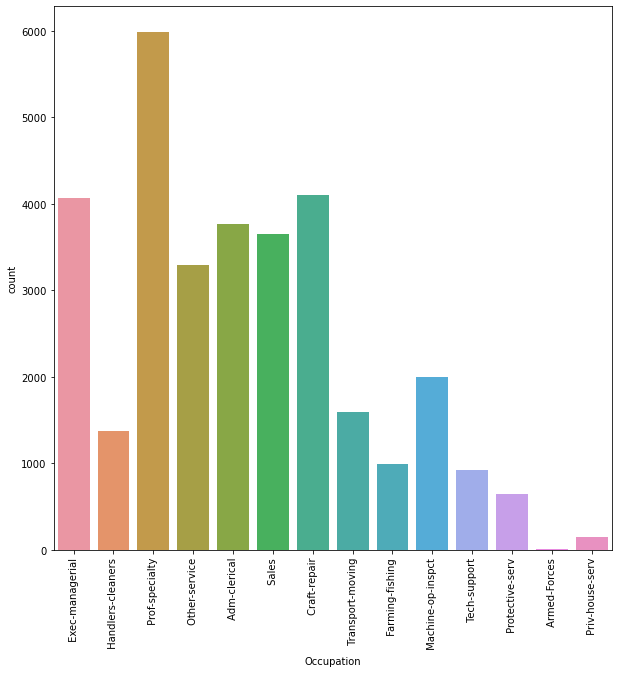

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
plt.show

#### occupation that contributed maximum to census income where Prof-specialty and least where from Armed Forces

<function matplotlib.pyplot.show(close=None, block=None)>

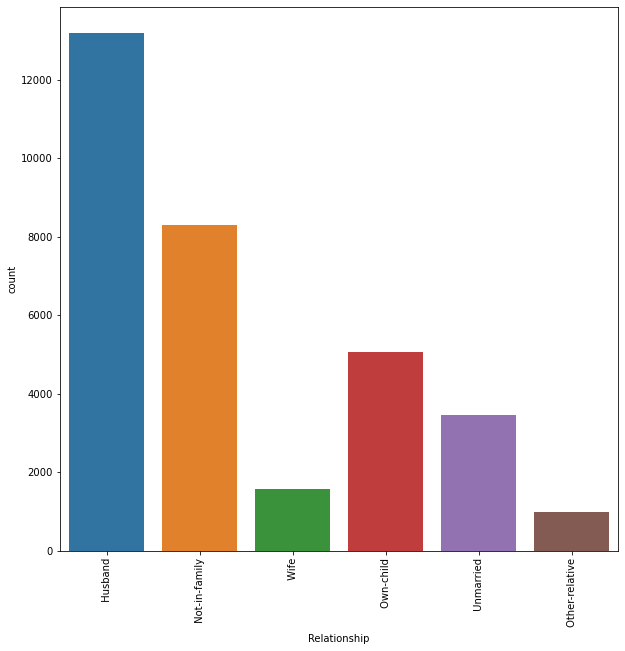

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(df['Relationship'])
plt.xticks(rotation=90)
plt.show

#### The count is high and maximum in Husband and the least is in other relative

<function matplotlib.pyplot.show(close=None, block=None)>

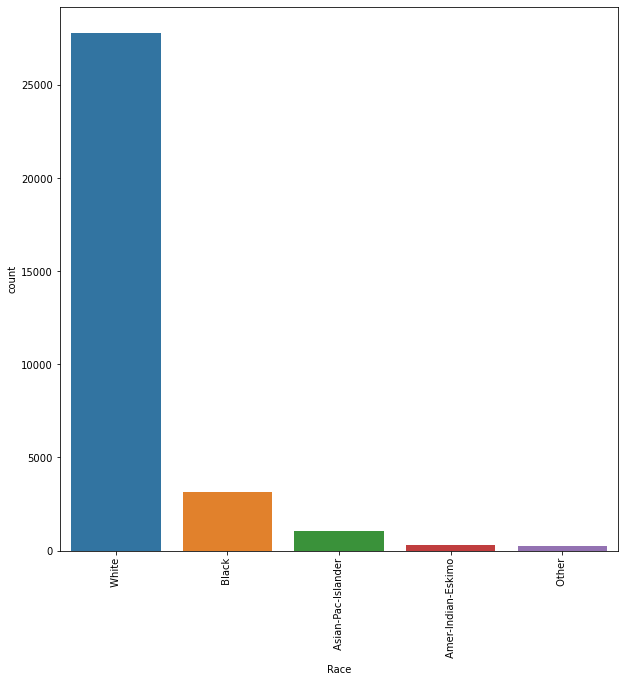

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(df['Race'])
plt.xticks(rotation=90)
plt.show

#### The Counts of WHite in the race are maximum and Other are less... which means max working people where white..

<function matplotlib.pyplot.show(close=None, block=None)>

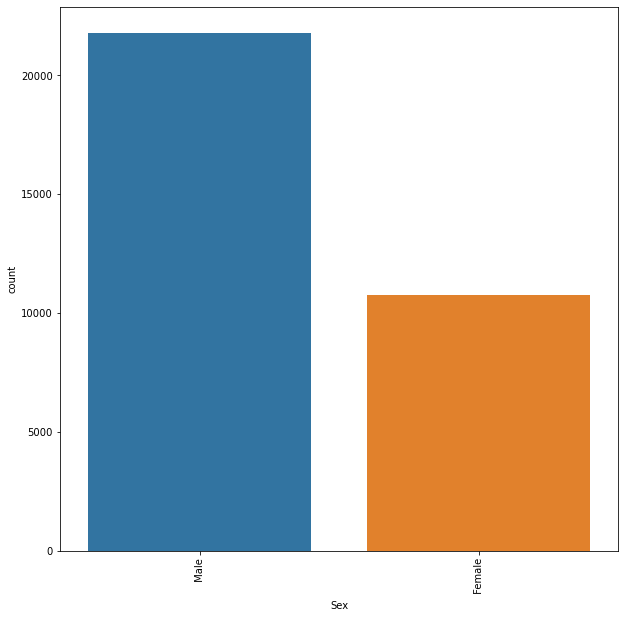

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(df['Sex'])
plt.xticks(rotation=90)
plt.show

#### The Count or contribution of male is more in income census as compared to Female

In [38]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

#### In capital gain 29849 out of 32560 is 0... so we will drop this column

In [39]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

##### In capital loss 31041 out of 32560 is 0... so we will drop this column

<function matplotlib.pyplot.show(close=None, block=None)>

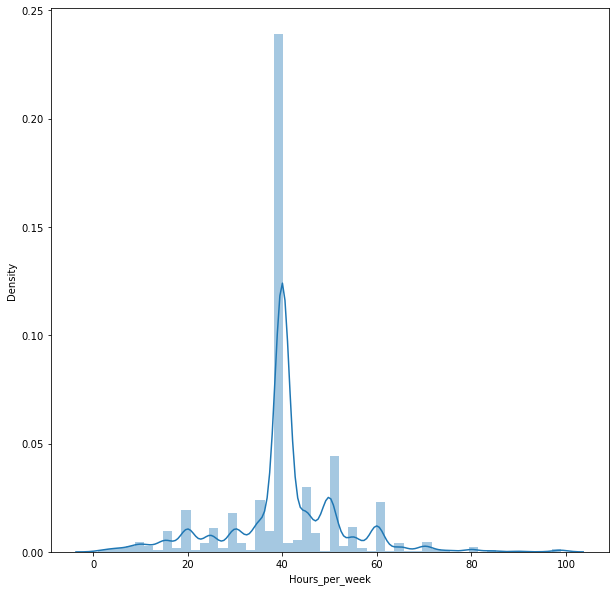

In [40]:
plt.figure(figsize=(10,10))
sns.distplot(df['Hours_per_week'])
plt.show

In [41]:
df['Hours_per_week'].mean()

40.437469287469284

#### Yes we can clearly that the average hours per week is 40 hrs ,which is contributing to census income

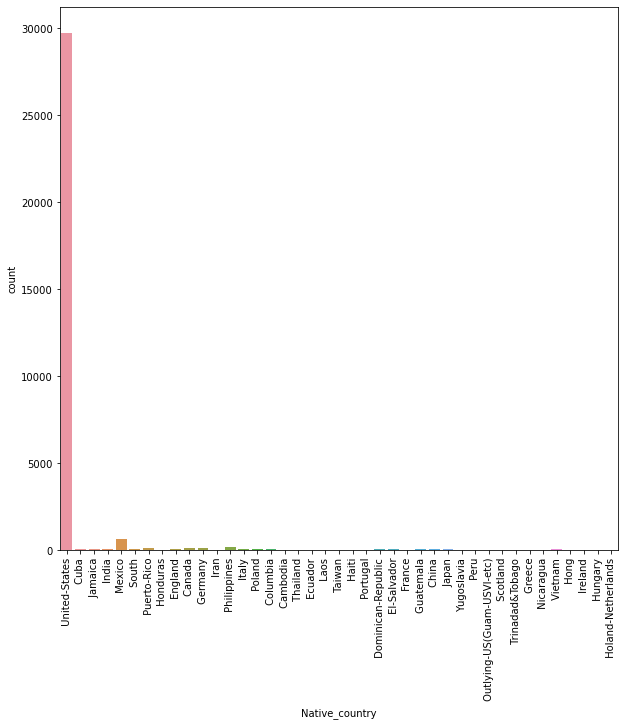

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(df["Native_country"])
plt.xticks(rotation=90)
plt.show()

#### The United States country has highest count and other countries have very less counts. which mean smax sample collected for census income were from United States

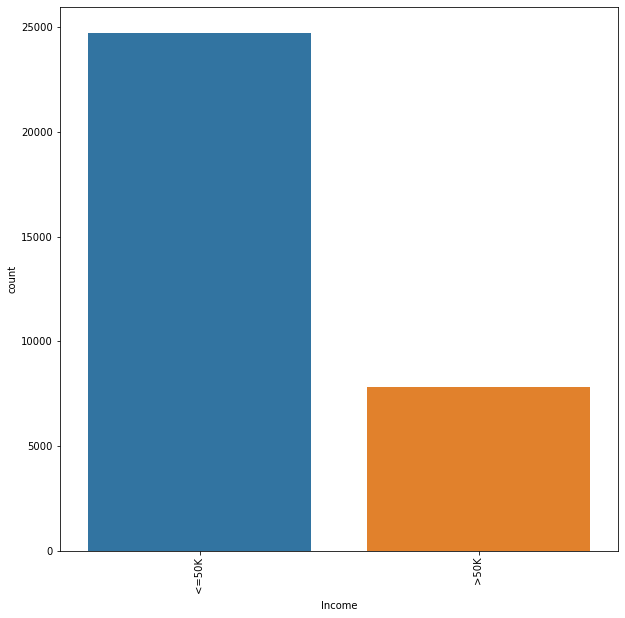

In [43]:
plt.figure(figsize=(10,10))
sns.countplot(df["Income"])
plt.xticks(rotation=90)
plt.show()

### The count of people are more who are paid more than 50k in a year

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:green'> B. Bivariate Analysis <h2>

In [45]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

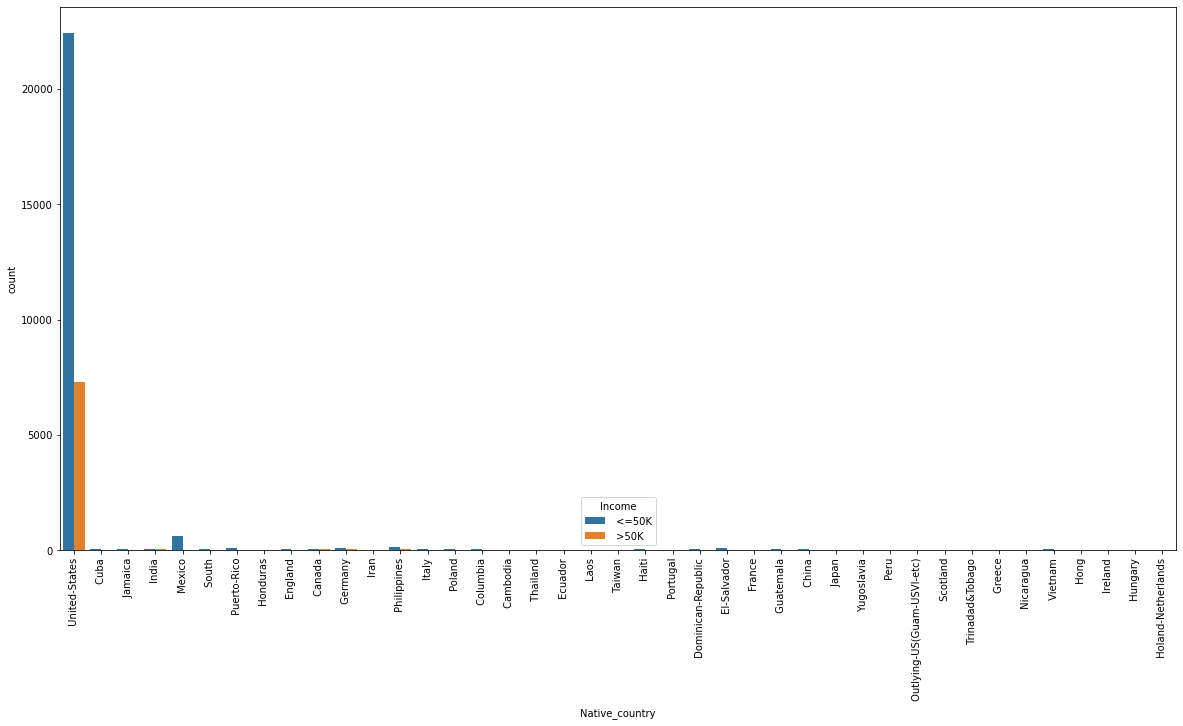

In [48]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Native_country", hue = "Income", data = df)
plt.xticks(rotation=90)

plt.show()

#### Maximum People seems to be employed in United Stated and are paid above and below 50k

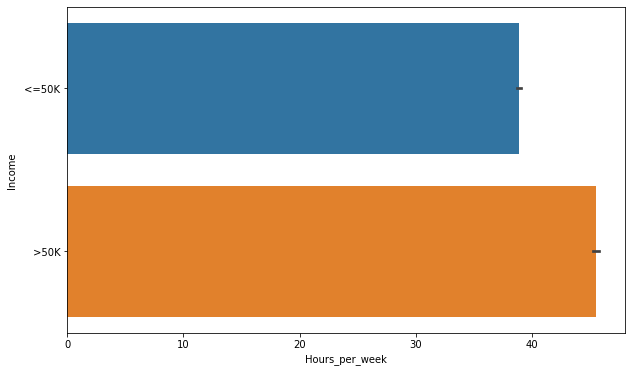

In [49]:
plt.figure(figsize = (10,6))
sns.barplot(x = "Hours_per_week", y = "Income", data = df)
plt.show()

#### People who are working for more hours in a week are paid more as compared to the people who are working for less hours in a weeks

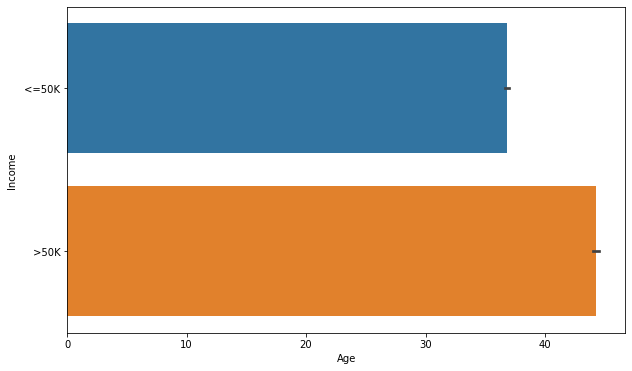

In [50]:
plt.figure(figsize = (10,6))
sns.barplot(x = "Age", y = "Income", data = df)
plt.show()

#### Not the exact conclusion we can say but to one extended we can say that as the age of the people increase their salary also increases this may be because of experience and Nowaday people are paid more irrespective of their age but on basic of their education and knowledge and we can clearly see that on the graph ,as people who are earning above 50k are falling in age group of 0 to 40+ and people who paid less than 50k fall in the age group which above the age till 38

<Figure size 720x720 with 0 Axes>

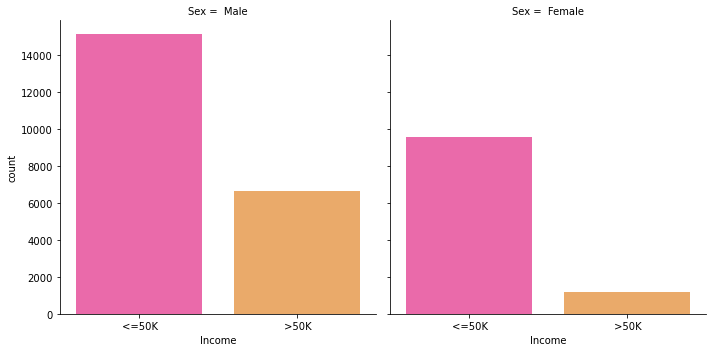

In [51]:
plt.figure(figsize = (10,10))
sns.catplot(x='Income',col='Sex',data=df,kind='count',palette="spring")
plt.show()

#### More Male are paid income more than 50k than females and Female are less who are paid above 50k in comparision with male.. whereas more male are getting salary less than 50k in comparision with female

<Figure size 720x720 with 0 Axes>

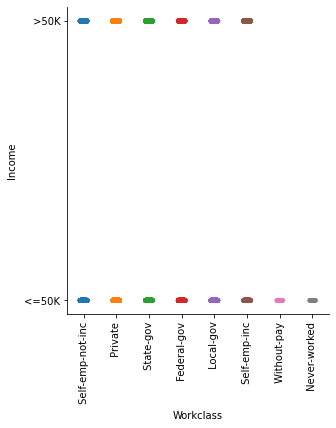

In [54]:
plt.figure(figsize = (10,10))
sns.catplot(x = "Workclass", y = "Income", data = df)
plt.xticks(rotation=90)
plt.show()

#### These are sector where people are working with different income group

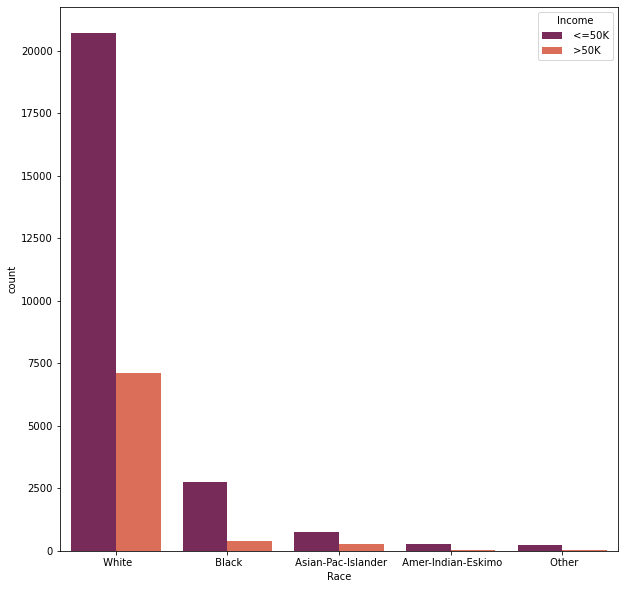

In [55]:
plt.figure(figsize=(10,10))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette="rocket")
plt.show()

#### Here we can see that White Race People are paid more as compared to black,asian  pas islander, amer indian eskimo and other and are more employed

<Figure size 720x720 with 0 Axes>

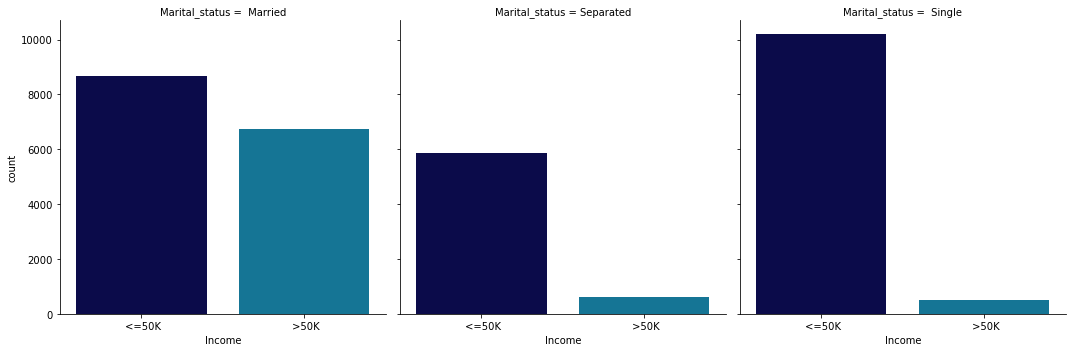

In [56]:
plt.figure(figsize=(10,10))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="ocean")
plt.show()

#### Here i can see that singles are having maximum income followed by Married people and least income is with Separated

<Figure size 720x720 with 0 Axes>

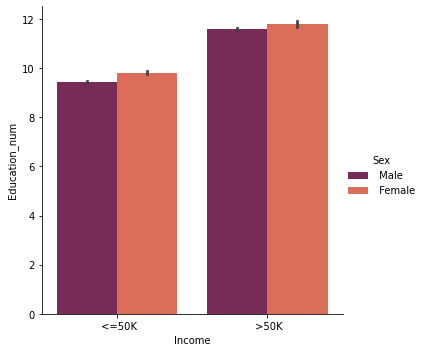

In [57]:
plt.figure(figsize = (10,10))
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="rocket")
plt.show()

#### The Income is more than 50K for the people having high education number. Here both gender have the income of more than 50K.

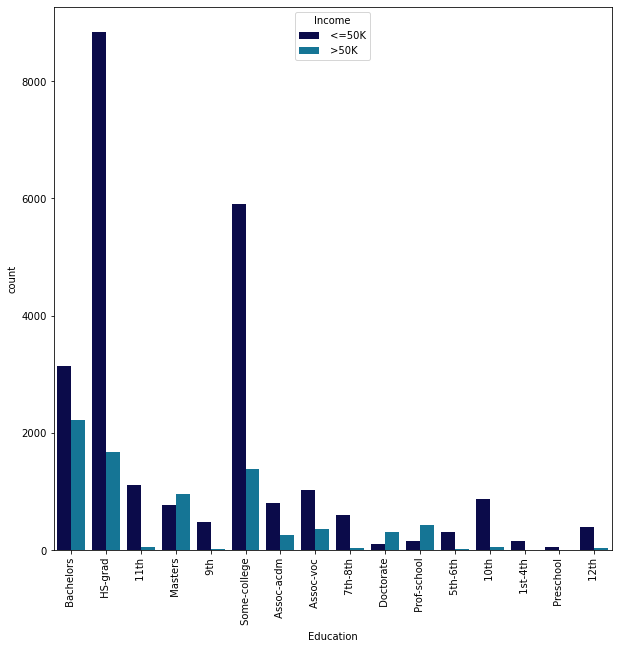

In [58]:
plt.figure(figsize = (10,10))
sns.countplot(df["Education"],hue=df["Income"],palette="ocean" )
plt.xticks(rotation=90)
plt.show()

#### Here we can see that maximum income is paid to bachelors and the maximum people who are paid less than 50k belongs from HS-grad

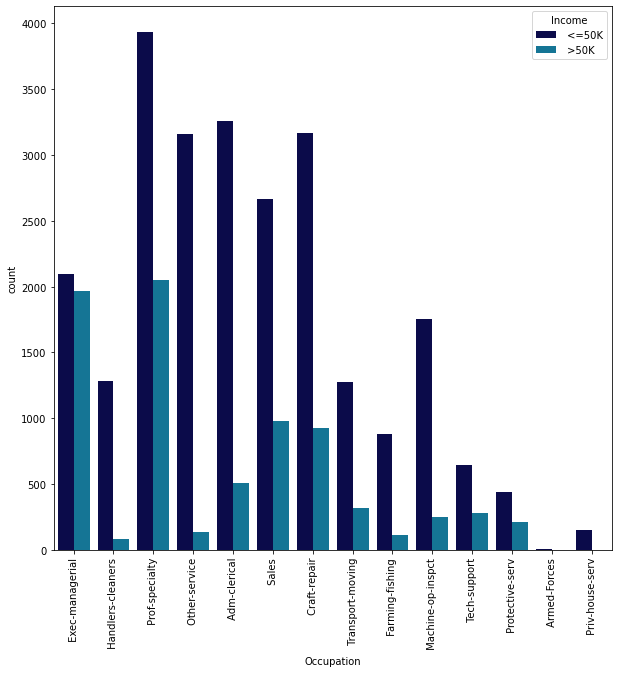

In [59]:
plt.figure(figsize = (10,10))
sns.countplot(df["Occupation"],hue=df["Income"],palette="ocean" )
plt.xticks(rotation=90)

plt.show()


#### The maximum income is paid to Prof-speciality and Exec-managerial and the least is paid to Armed forces and Priv House Ser

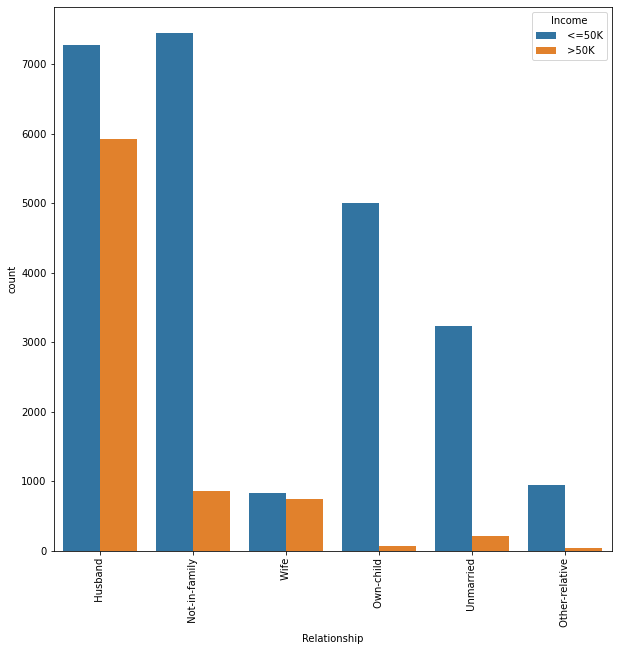

In [61]:
plt.figure(figsize=(10,10))
sns.countplot(df["Relationship"],hue=df["Income"] )
plt.xticks(rotation=90)
plt.show()

#### In Relationship Columns Husband income are paid more as compared to all other relationship

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:green'> C. Multi-variate Analysis <h2>

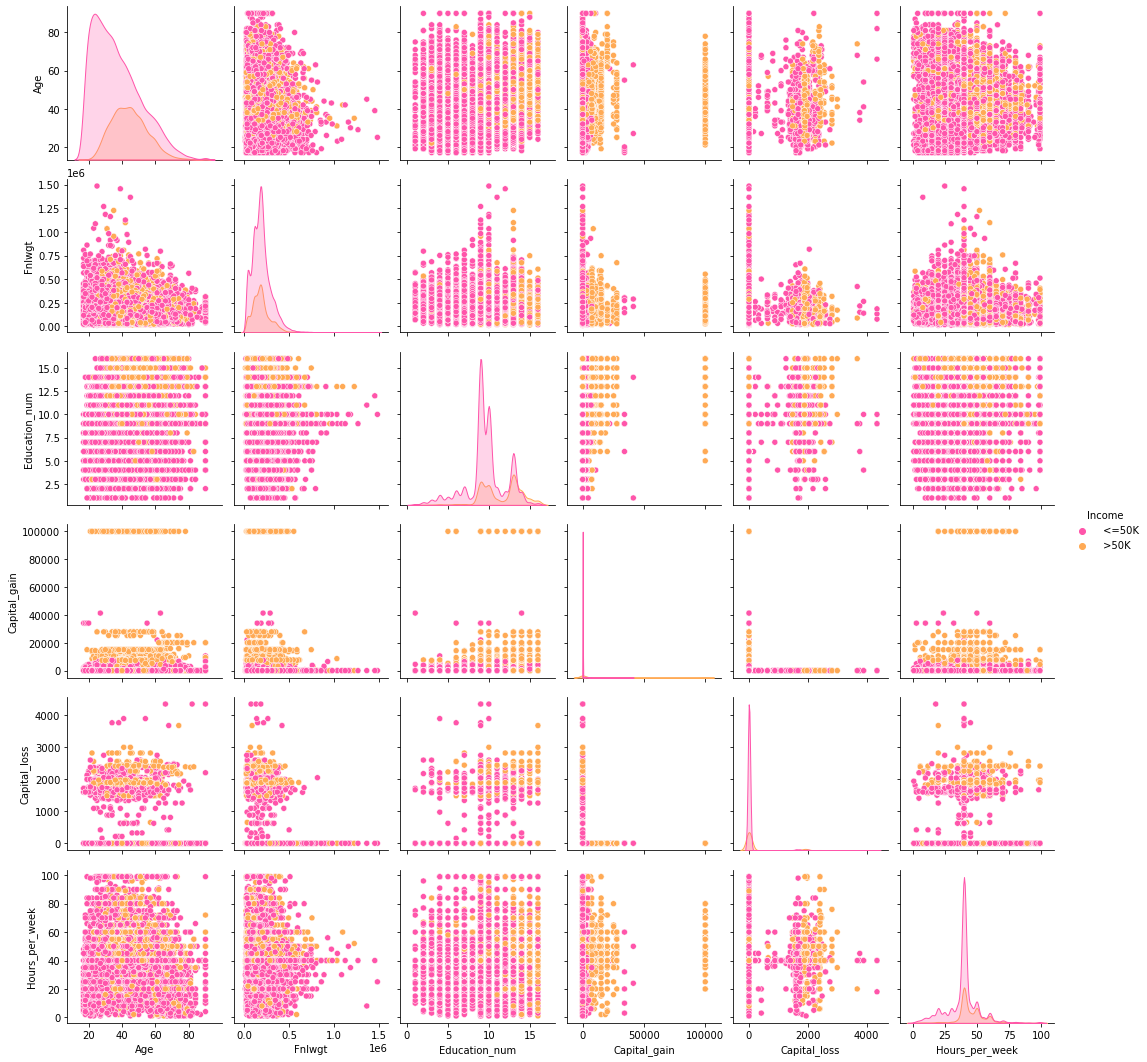

In [62]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="spring")

#### This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Income". Here we can observe the relation between the features and label.

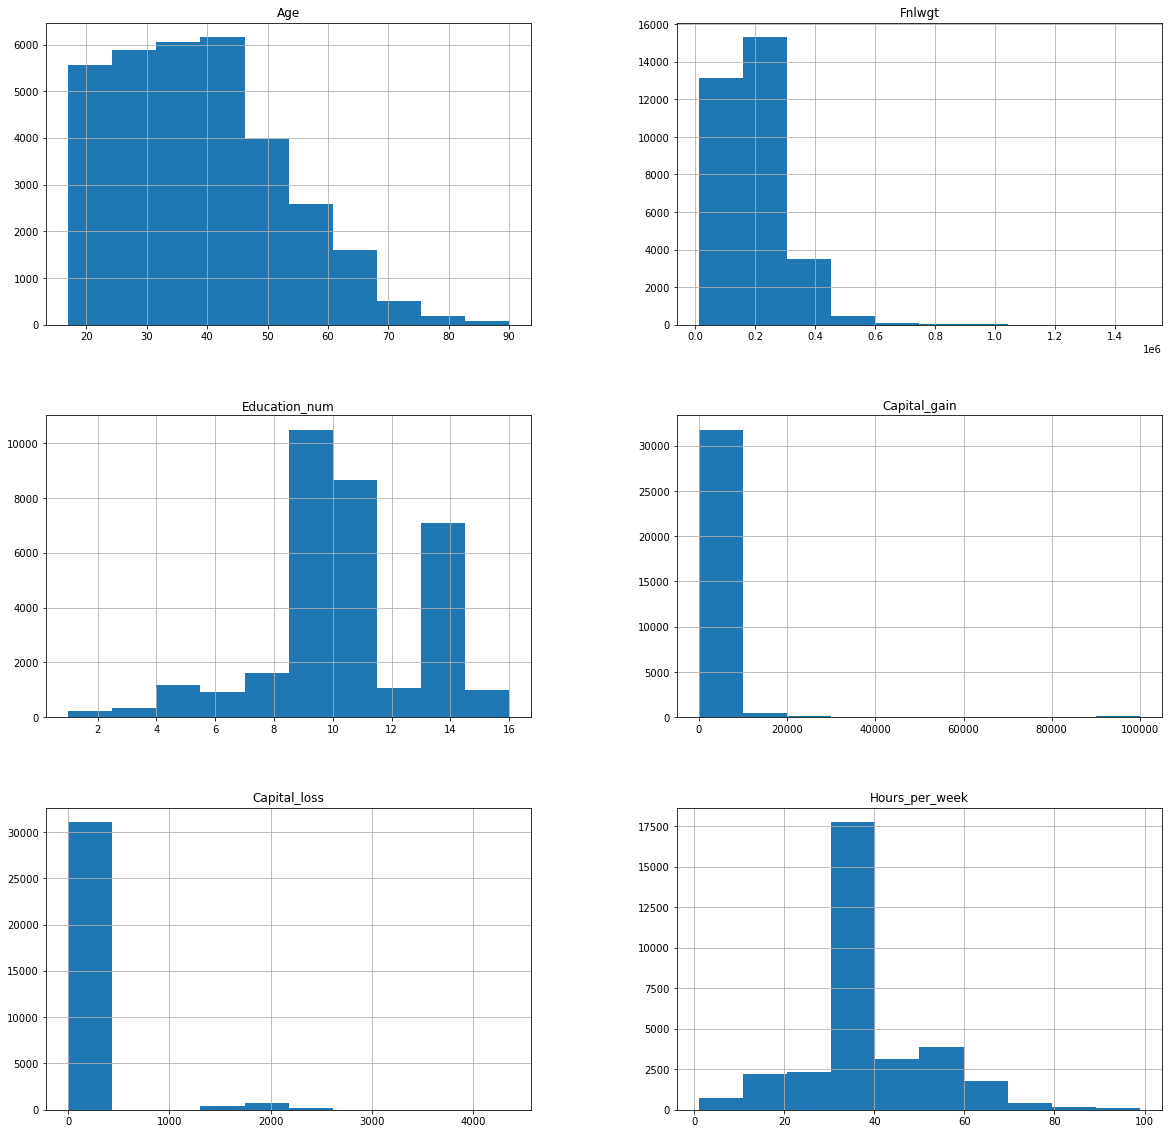

In [63]:
df.hist(bins=10, figsize=(20,20))
plt.show()

#### We can see in Numerical columns lot of skewness is present. We are gonna a correct it later

Age                  AxesSubplot(0.125,0.787927;0.227941x0.0920732)
Fnlwgt            AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
Education_num     AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
Capital_gain         AxesSubplot(0.125,0.677439;0.227941x0.0920732)
Capital_loss      AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
Hours_per_week    AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
dtype: object

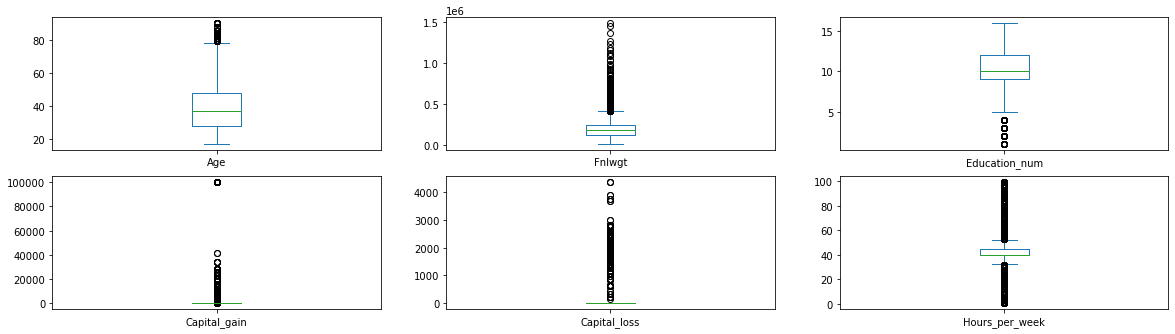

In [64]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(20,20))

#### All the Numerical columns are having Outliers ,we will remove it later

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:green'> CORRELATION <h2>

In [66]:
from sklearn.preprocessing import LabelEncoder

In [68]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [69]:
#Lets convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

for i in Input:
    df[i] = le.fit_transform(df[i])

In [70]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,0,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,2,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,0,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,0,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,0,3,5,4,0,0,0,40,38,0


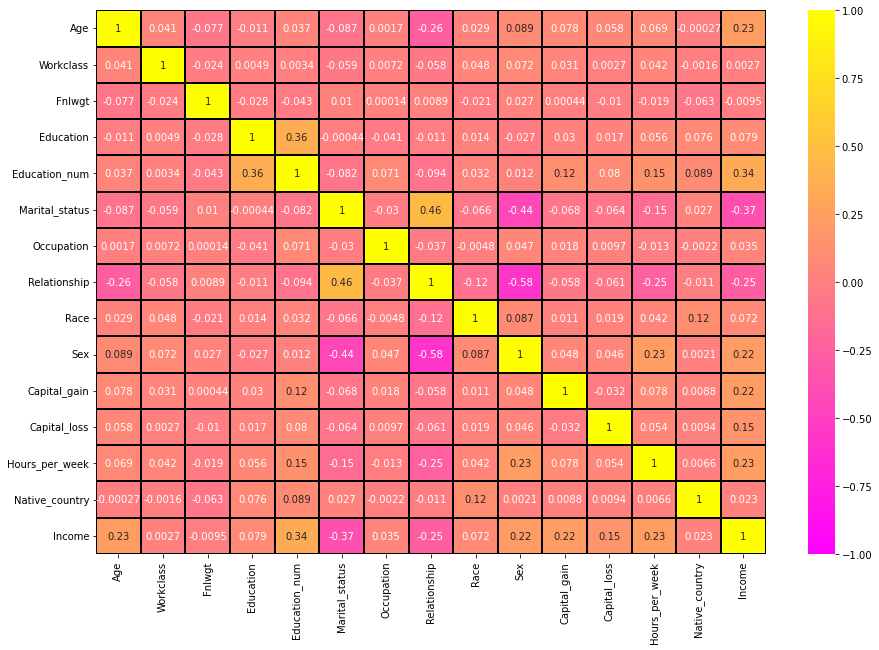

In [72]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="spring")
plt.yticks(rotation=0);

#### This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

In [73]:
df.corr()['Income'].sort_values()

Marital_status   -0.368848
Relationship     -0.250924
Fnlwgt           -0.009481
Workclass         0.002739
Native_country    0.023063
Occupation        0.034599
Race              0.071853
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

#### We can see that some columns are Negatively correlated and some are positively correlated ..Max positively correlated column is :- Education_num and Max Negetively column is :- Marital Status

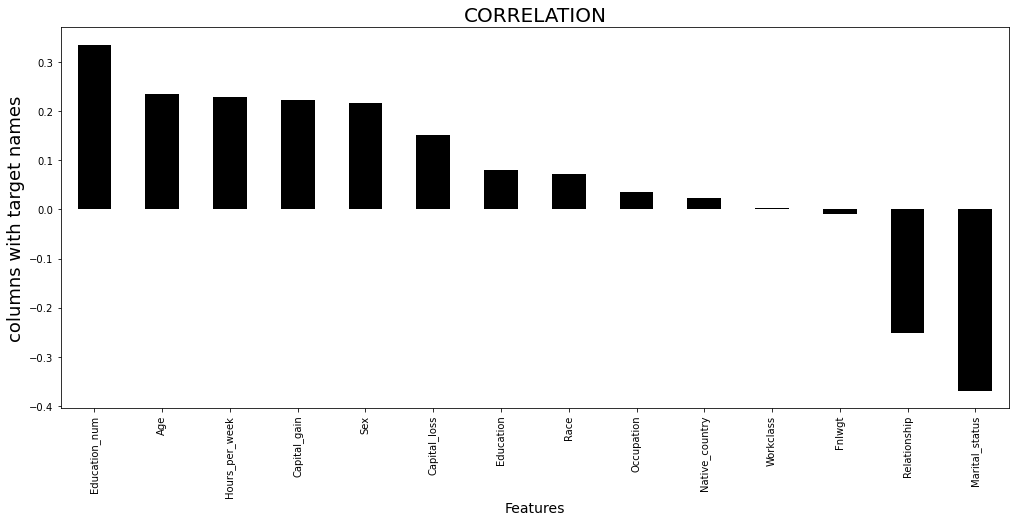

In [74]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

In [75]:
#### lets drop the least corr columns with target

df.drop(['Workclass','Fnlwgt','Native_country'],axis=1,inplace=True)

In [76]:
### dropping column which have max of 0 value..
df.drop(['Capital_gain','Capital_loss'],axis=1,inplace=True)

###In capital gain 29849 out of 32560 is 0... so we will drop this column
###In capital gain 31041 out of 32560 is 0... so we will drop this column


<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:green'> DESCRIPTIVE STATISTICS <h2>

In [77]:
df.describe()

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,10.298249,10.080590,0.724939,6.138943,1.446376,3.665848,0.669195,40.437469,0.240817
std,13.640642,3.870317,2.572709,0.772197,3.972623,1.606794,0.848817,0.470510,12.347618,0.427586
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,9.000000,0.000000,3.000000,0.000000,4.000000,0.000000,40.000000,0.000000
50%,37.000000,11.000000,10.000000,1.000000,6.000000,1.000000,4.000000,1.000000,40.000000,0.000000
75%,48.000000,12.000000,12.000000,1.000000,9.000000,3.000000,4.000000,1.000000,45.000000,0.000000
max,90.000000,15.000000,16.000000,2.000000,13.000000,5.000000,4.000000,1.000000,99.000000,1.000000


#### All columns count is equal which means no missing value and outliers and skewness is also present

<AxesSubplot:>

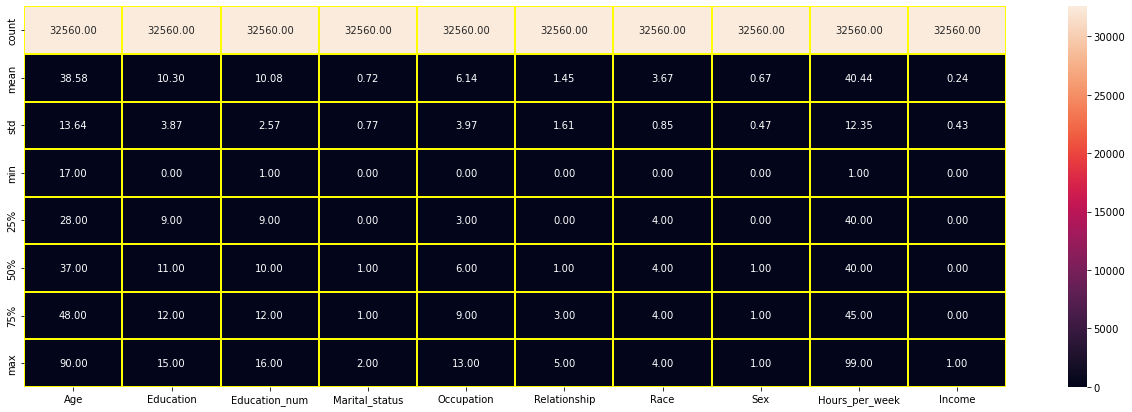

In [78]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="yellow",fmt="0.2f")

<h2 style='text-align:center;font-size:50px;background-color:white;border:50px;color:green'> Lets Check And Remove Outliers<h2>


# ZScore Method

In [80]:
# Features containing outliers
features = df[["Age","Education_num","Hours_per_week"]]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Age,Education_num,Hours_per_week
0,0.837097,1.134779,2.222120
1,0.042640,0.420027,0.035430
2,1.057031,1.197429,0.035430
3,0.775755,1.134779,0.035430
4,0.115952,1.523480,0.035430
...,...,...,...
32555,0.849066,0.746077,0.197407
32556,0.103982,0.420027,0.035430
32557,1.423589,0.420027,0.035430
32558,1.215624,0.420027,1.655200


In [81]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,50,9,13,0,3,0,4,1,13,0
1,38,11,9,2,5,1,4,1,40,0
2,53,1,7,0,5,0,2,1,40,0
3,28,9,13,0,9,5,2,0,40,0
4,37,12,14,0,3,5,4,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32555,27,7,12,0,12,5,4,0,38,0
32556,40,11,9,0,6,0,4,1,40,1
32557,58,11,9,2,0,4,4,0,40,0
32558,22,11,9,1,0,3,4,1,20,0


In [82]:
df_new.shape

(31794, 10)

In [83]:
df.shape

(32560, 10)

In [84]:
# Percentage of data loss

DataLoss=((32560-31794)/32560)*100
DataLoss

2.3525798525798525

#### There is 2% of data lodd in Zscore Method

# IQR Method

In [85]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [86]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (32560, 10)

New DataFrame data in Rows and Column: (12718, 10)

Total Dropped rows: 19842


In [87]:
#Percentage Data Loss using IQR
data_loss1 = (32560-12718)/32560*100
data_loss1

60.93980343980344

### There is 60% data loss so i am going for ZScore Method

<h2 style='text-align:center;font-size:40px;background-color:white;border:30px;color:green'> *Now Lets Remove Skewness Now* <h2>


In [88]:
df.skew()

Age               0.558738
Education        -0.934063
Education_num    -0.311630
Marital_status    0.516457
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Income            1.212383
dtype: float64

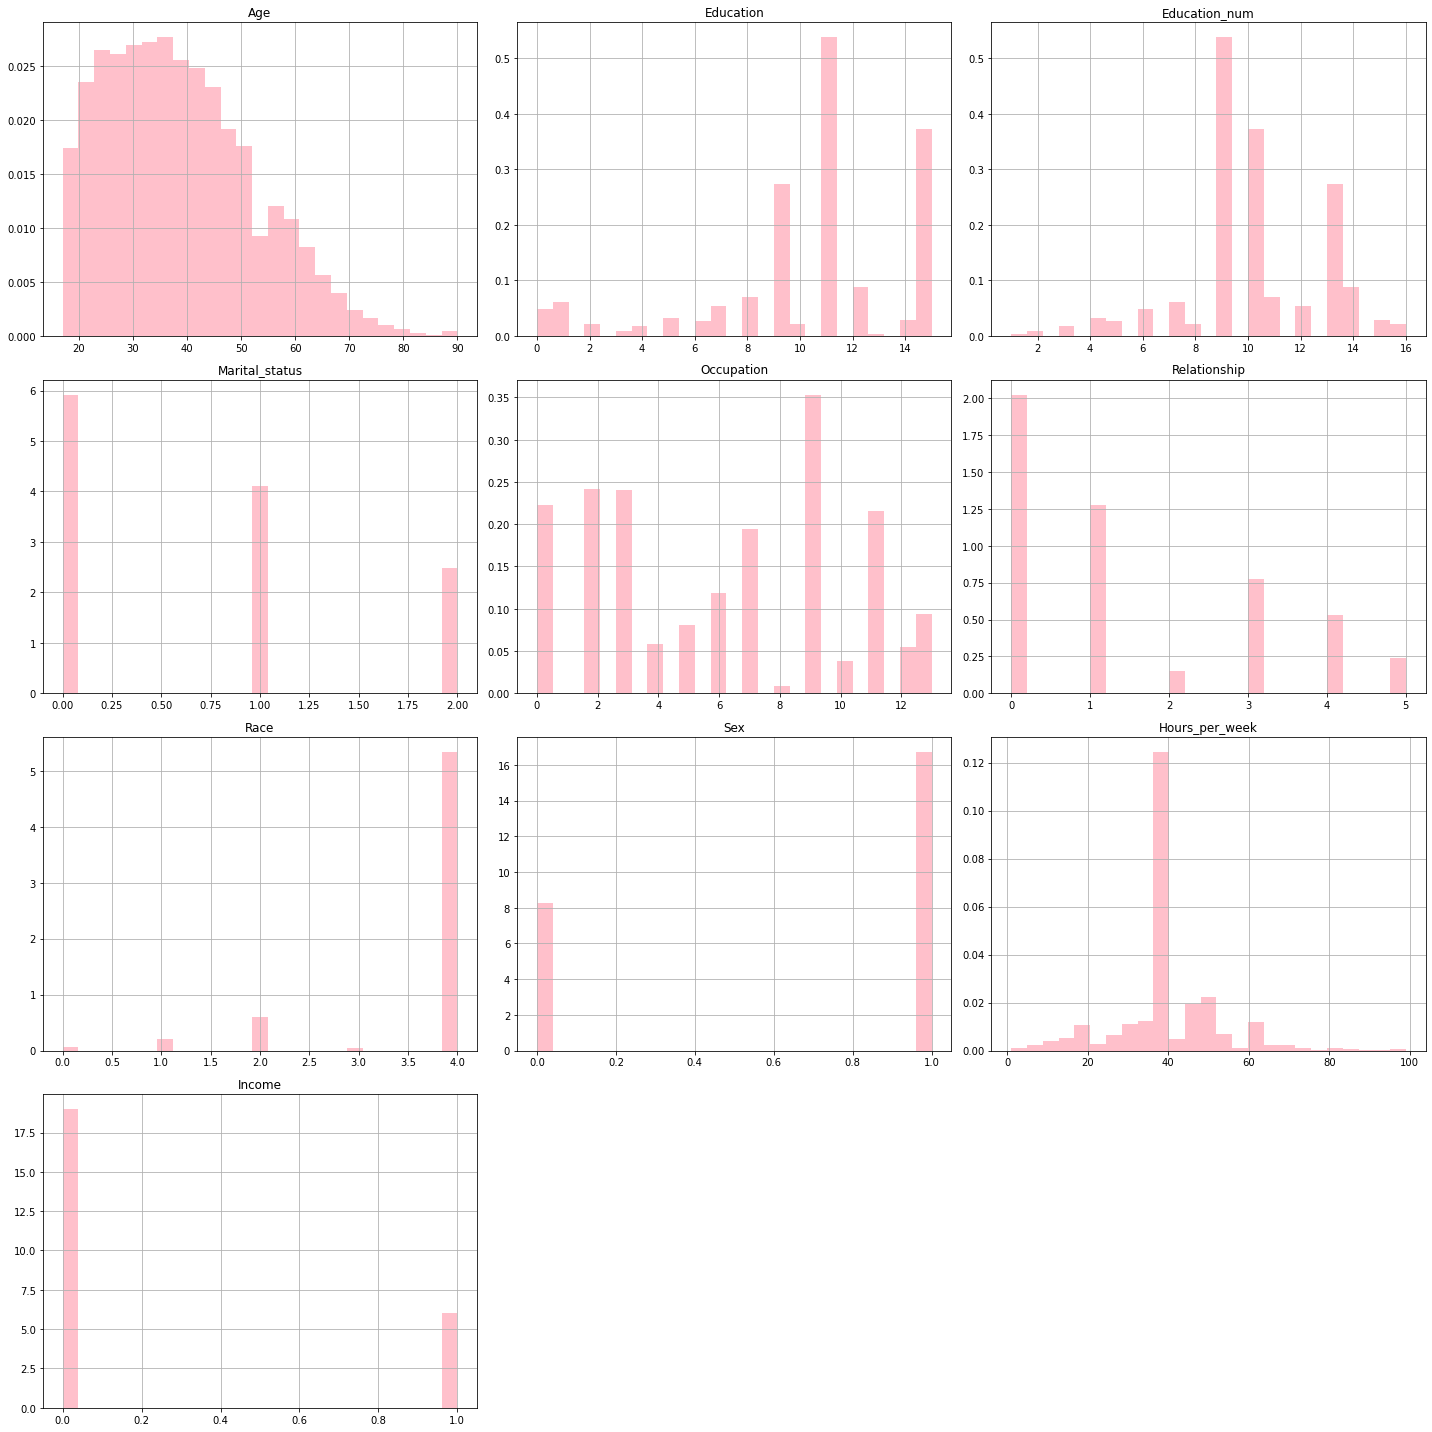

In [91]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='pink',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

#### Through graph it is clear columns have skewness lets treat it first...

In [92]:
L1=['Age','Education_num']

In [93]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [94]:
#Removing skewness using yeo-johnson
df_new[['Age','Education_num']] = PT.fit_transform(df_new[['Age','Education_num']].values)

In [95]:
#Checking skewness after removing skewness by power transform
df_new.skew()

Age              -0.019354
Education        -0.949238
Education_num     0.019645
Marital_status    0.511882
Occupation        0.004979
Relationship      0.776451
Race             -2.432671
Sex              -0.709694
Hours_per_week   -0.342396
Income            1.206468
dtype: float64

#### We can see that the skewness from all the columns ahve been removed except the catagorical columns

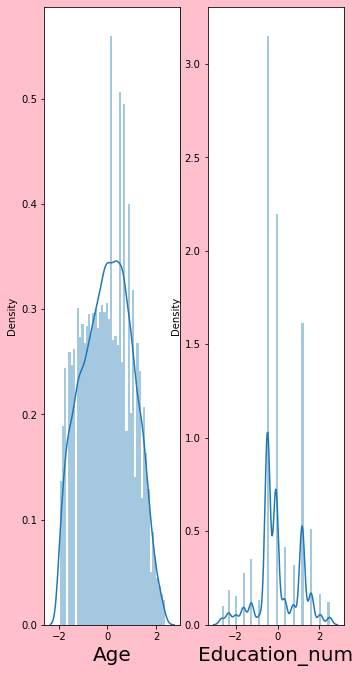

In [96]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='pink')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Now skewness is removed and data is normally distributed

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> Now Lets Split the dataset into dependent and independent variable <h2>

In [97]:
df_new.head()

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,0.918516,9,1.170541,0,3,0,4,1,13,0
1,0.112862,11,-0.482102,2,5,1,4,1,40,0
2,1.095886,1,-1.258518,0,5,0,2,1,40,0
3,-0.727637,9,1.170541,0,9,5,2,0,40,0
4,0.037144,12,1.601438,0,3,5,4,0,40,0


In [98]:
x=df_new.loc [:,df_new.columns != 'Income']
# Independent Variable

In [99]:
y=df_new.loc[:,'Income']
#Dependent Variable

In [101]:
x.shape

(31794, 9)

In [102]:
y.shape

(31794,)

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:green'> Now Lets Scale The Dataset <h2>

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week
0,0.918516,-0.346835,1.170541,-0.942188,-0.783463,-0.903719,0.393919,0.706256,-2.426488
1,0.112862,0.173123,-0.482102,1.650837,-0.281641,-0.282441,0.393919,0.706256,-0.008015
2,1.095886,-2.426667,-1.258518,-0.942188,-0.281641,-0.903719,-1.964256,0.706256,-0.008015
3,-0.727637,-0.346835,1.170541,-0.942188,0.722002,2.202667,-1.964256,-1.415917,-0.008015
4,0.037144,0.433102,1.601438,-0.942188,-0.783463,2.202667,0.393919,-1.415917,-0.008015
...,...,...,...,...,...,...,...,...,...
31789,-0.823902,-0.866793,0.746310,-0.942188,1.474735,2.202667,0.393919,-1.415917,-0.187161
31790,0.259765,0.173123,-0.482102,-0.942188,-0.030731,-0.903719,0.393919,0.706256,-0.008015
31791,1.374750,0.173123,-0.482102,1.650837,-1.536196,1.581390,0.393919,-1.415917,-0.008015
31792,-1.351088,0.173123,-0.482102,0.354324,-1.536196,0.960113,0.393919,0.706256,-1.799476


### Lets check Multicollinearity through VIF

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [107]:
vif_cal()

   VIF FACTOR        FEATURES
0    1.108770             Age
1    1.128172       Education
2    1.176363   Education_num
3    1.348492  Marital_status
4    1.016002      Occupation
5    1.807813    Relationship
6    1.014999            Race
7    1.650273             Sex
8    1.122309  Hours_per_week


#### So there is no multicollinearity as Vif is less than 10

## Balancing the dataset over here,otherwise it will be a baised dataset

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [110]:
x.shape

(48216, 9)

In [111]:
y.shape

(48216,)

<AxesSubplot:xlabel='Income', ylabel='count'>

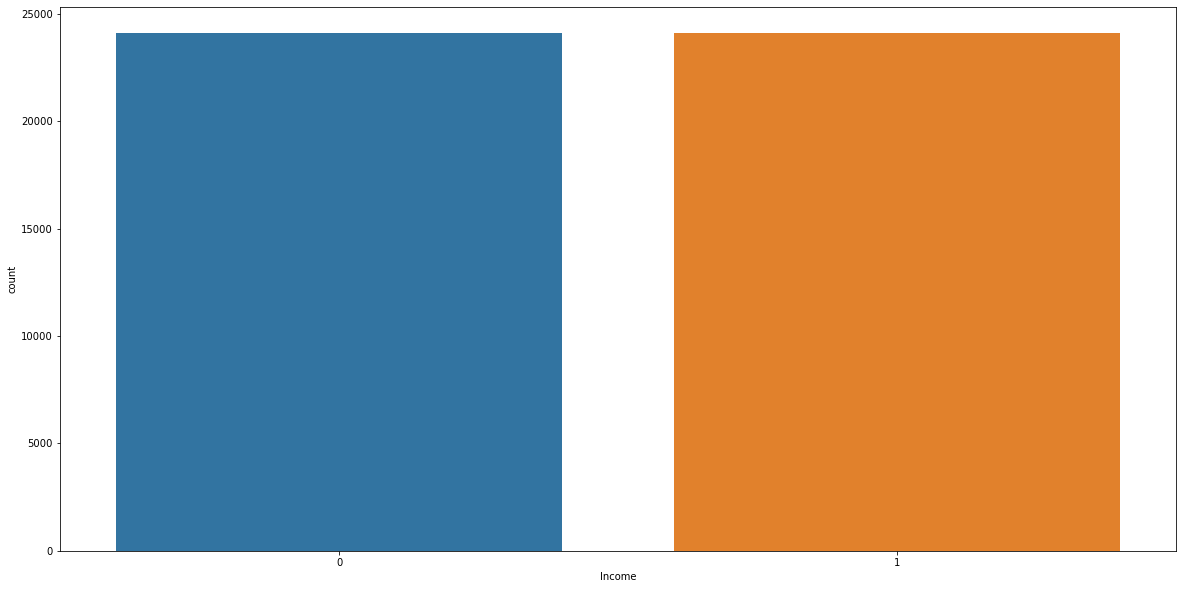

In [113]:
plt.figure(figsize=(20,10))
sns.countplot(y)

### Now Target variable is balanced

# Model Training and Testing

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split

In [116]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  14  The model performs very well
At random_state:- 14
Training accuaracy_score is :- 79.2
Testing accuracy_score is:- 79.2 


At random state  27  The model performs very well
At random_state:- 27
Training accuaracy_score is :- 79.2
Testing accuracy_score is:- 79.2 


At random state  35  The model performs very well
At random_state:- 35
Training accuaracy_score is :- 79.2
Testing accuracy_score is:- 79.2 


At random state  36  The model performs very well
At random_state:- 36
Training accuaracy_score is :- 79.1
Testing accuracy_score is:- 79.1 


At random state  66  The model performs very well
At random_state:- 66
Training accuaracy_score is :- 79.2
Testing accuracy_score is:- 79.2 


At random state  68  The model performs very well
At random_state:- 68
Training accuaracy_score is :- 79.2
Testing accuracy_score is:- 79.2 


At random state  74  The model performs very well
At random_state:- 74
Training accuaracy_score is :- 79.2
Testing accuracy_score is:- 79.2 



In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=14)

In [118]:
lr.fit(x_train,y_train)

LogisticRegression()

In [119]:
pred_train=lr.predict(x_train)

In [120]:
pred_test=lr.predict(x_test)

In [121]:
accuracy_score(y_test,pred_test)

0.7917876399834094

In [122]:
from sklearn.metrics import classification_report

In [123]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      4867
           1       0.77      0.82      0.80      4777

    accuracy                           0.79      9644
   macro avg       0.79      0.79      0.79      9644
weighted avg       0.79      0.79      0.79      9644



# CV for Logistic Regression

In [124]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [125]:
for i in range(3,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 3
Cross validation score is :- 79.20607267297163
Accuracy_score is :- 79.17876399834094


At cv:- 4
Cross validation score is :- 79.1687406669985
Accuracy_score is :- 79.17876399834094


At cv:- 5
Cross validation score is :- 79.23719163175554
Accuracy_score is :- 79.17876399834094


At cv:- 6
Cross validation score is :- 79.19155467064874
Accuracy_score is :- 79.17876399834094


At cv:- 7
Cross validation score is :- 79.214368674299
Accuracy_score is :- 79.17876399834094


At cv:- 8
Cross validation score is :- 79.1894806703169
Accuracy_score is :- 79.17876399834094


At cv:- 9
Cross validation score is :- 79.18534902514797
Accuracy_score is :- 79.17876399834094




In [126]:
# I will take CV as 5 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.7923719163175553 
The accuracy_score is: 0.7917876399834094


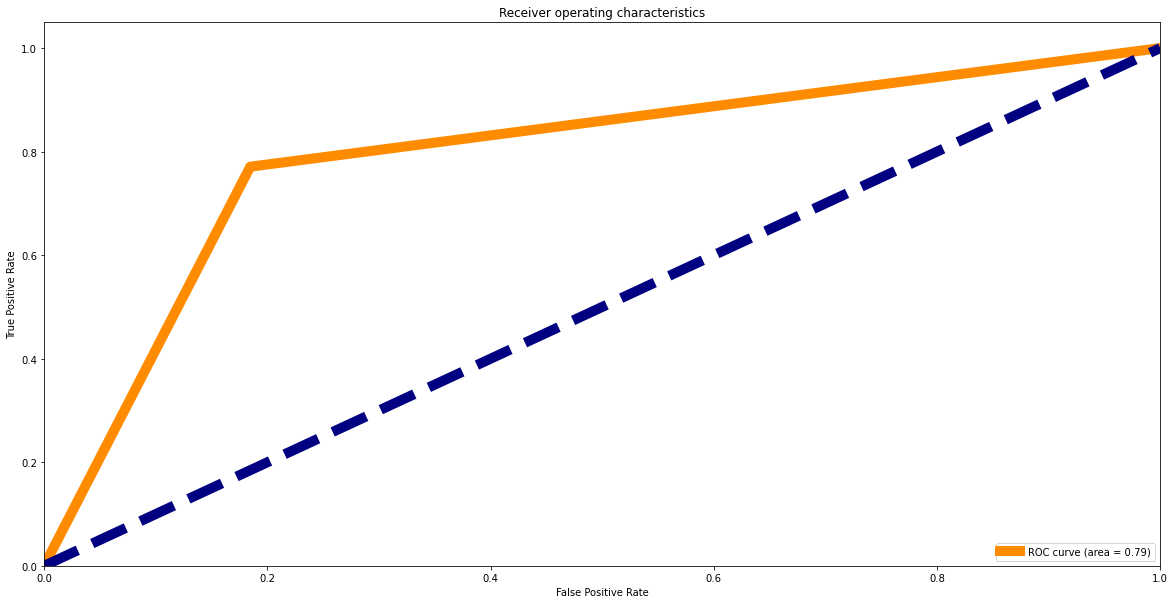

In [127]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(20,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression covers 79% in ROC Curve

# Decision Tree Classifier

In [155]:
# Checking Accuracy for Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Prediction
preddt = dt.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))
print('CV  :-',cross_val_score(dt,x,y,cv=5).mean())


0.8305682289506429
[[4035  832]
 [ 802 3975]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4867
           1       0.83      0.83      0.83      4777

    accuracy                           0.83      9644
   macro avg       0.83      0.83      0.83      9644
weighted avg       0.83      0.83      0.83      9644

CV  :- 0.8275071375350102


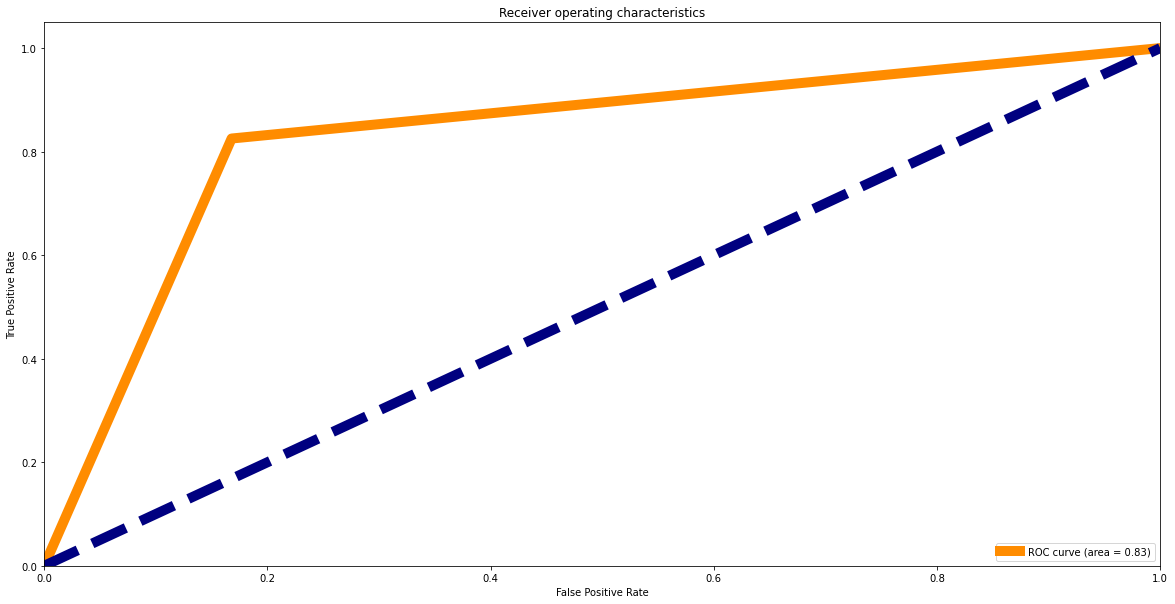

In [129]:
fpr,tpr,threshold=roc_curve(preddt,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(20,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### DTC covers 83% under ROC Curve

# KNeighbors Classifier

In [130]:
# Checking accuracy for KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))
print('CV  :-',cross_val_score(knn,x,y,cv=5).mean())


0.8269390294483617
[[3734 1133]
 [ 536 4241]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      4867
           1       0.79      0.89      0.84      4777

    accuracy                           0.83      9644
   macro avg       0.83      0.83      0.83      9644
weighted avg       0.83      0.83      0.83      9644

CV  :- 0.827941321003887


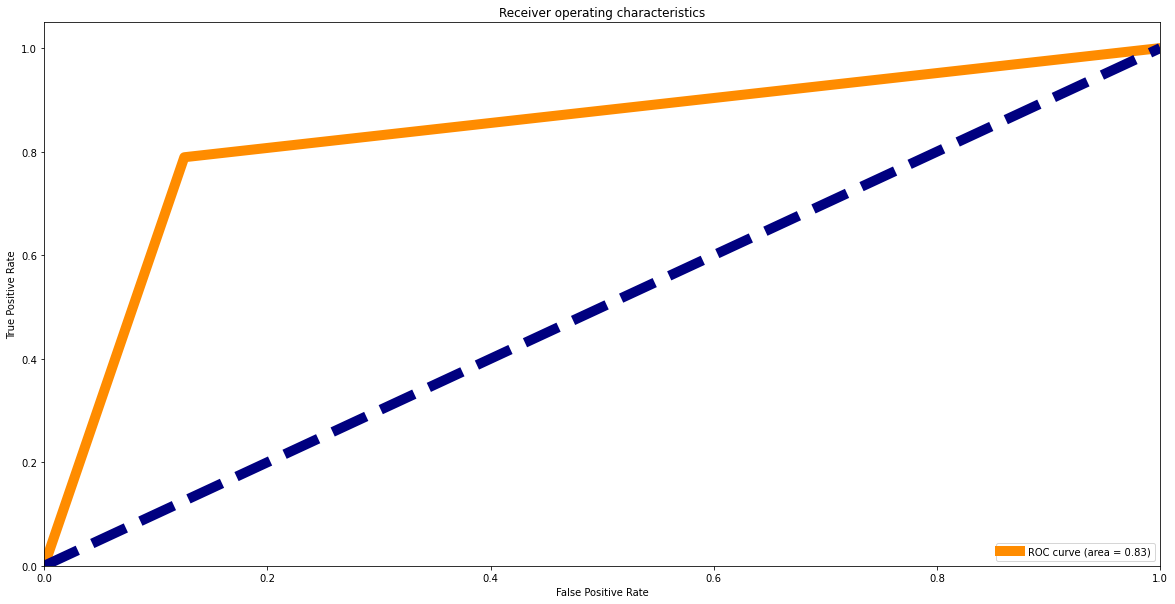

In [131]:
fpr,tpr,threshold=roc_curve(predknn,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(20,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

# KNC covers 83% under ROC Curve

# Ensemble Technique

In [132]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('CV  :-',cross_val_score(rf,x,y,cv=5).mean())


0.8635420987142265
[[4150  717]
 [ 599 4178]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4867
           1       0.85      0.87      0.86      4777

    accuracy                           0.86      9644
   macro avg       0.86      0.86      0.86      9644
weighted avg       0.86      0.86      0.86      9644

CV  :- 0.8617692368273193


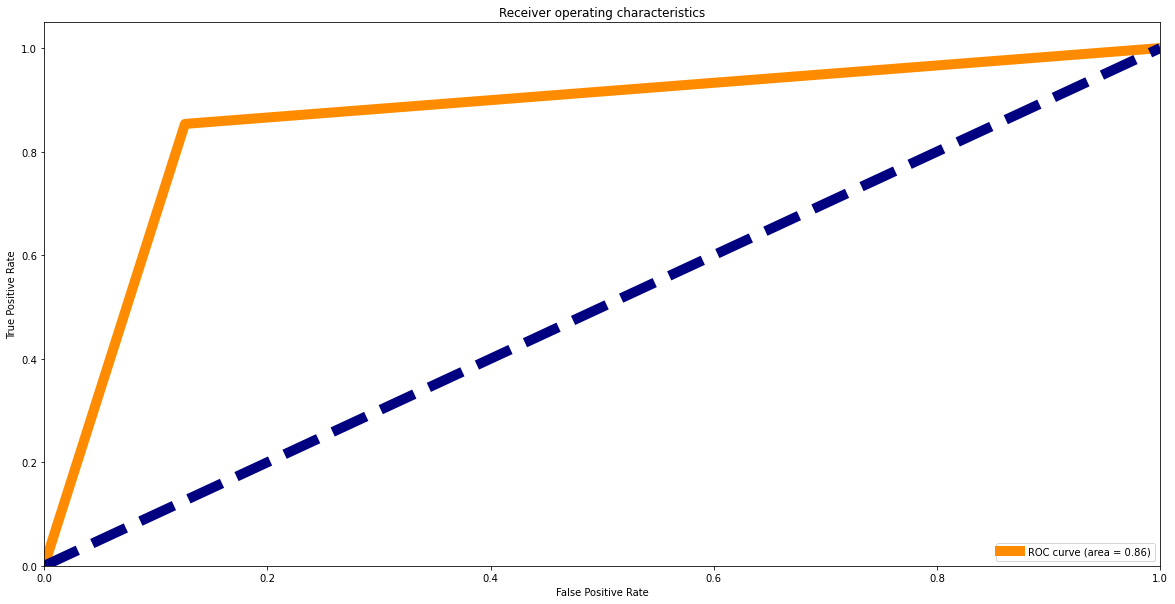

In [134]:
fpr,tpr,threshold=roc_curve(predrf,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(20,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### RFC overs 86% under ROC Curve

In [135]:
# Checking accuracy for Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

print('CV  :-',cross_val_score(gb,x,y,cv=5).mean())


0.839070924927416
[[3848 1019]
 [ 533 4244]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4867
           1       0.81      0.89      0.85      4777

    accuracy                           0.84      9644
   macro avg       0.84      0.84      0.84      9644
weighted avg       0.84      0.84      0.84      9644

CV  :- 0.8382908811815319


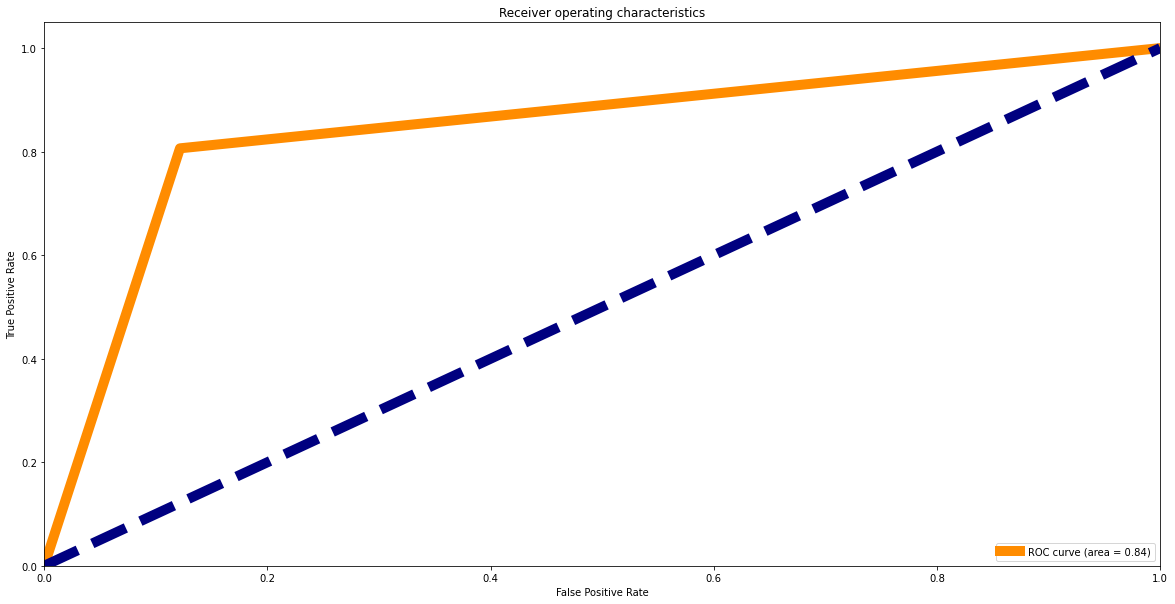

In [136]:
fpr,tpr,threshold=roc_curve(predgb,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(20,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### GBC covers 84% under ROC Curve

In [137]:
mm=pd.DataFrame([["LR","79%"],["Decision Tree Classifier","83%"],["KNeighbors Classifier","83%"],["Random Forest Classifier","86%"],["Gradient Boosting","84%"]],
                    columns=["Model_Name","AccuracyScore"])

mm

,Model_Name,AccuracyScore
0,LR,79%
1,Decision Tree Classifier,83%
2,KNeighbors Classifier,83%
3,Random Forest Classifier,86%
4,Gradient Boosting,84%


### Random Forest Classifier is performing the best

# Hyperparameter Tuning

In [138]:
from sklearn.model_selection import GridSearchCV


In [139]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [140]:
#RandomForestClassifier
parameters = {'bootstrap' : [True, False],'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[2,200],
             'max_depth':[2,3,4,6,7,8,10,12,14,16,18,20,22,24,26,28,30]}

In [141]:
qq=GridSearchCV(RandomForestClassifier(),parameters,cv=5)


In [142]:
qq.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 6, 7, 8, 10, 12, 14, 16, 18, 20,
                                       22, 24, 26, 28, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [2, 200]})

In [143]:
qq.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200}

In [144]:
RandomForestClassifier(bootstrap = True,max_depth=20, max_features='auto', n_estimators=200)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print('Accuracy_Score :-> ',accuracy_score(y_test,pred)*100)

Accuracy_Score :->  86.15719618415595


## Our Accuracy score is same as Earlier but still it is the best so far so we will gowith ds only (86%)

# Now save the final model

In [145]:
#Saving the model using .pkl
import joblib
joblib.dump(rf,"Census_report.pkl")

['Census_report.pkl']

In [146]:
#Loading the saved model
aa=joblib.load("Census_report.pkl")

In [147]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([1, 0, 0, ..., 1, 0, 0])

In [148]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,9634,9635,9636,9637,9638,9639,9640,9641,9642,9643
Predicted,1,0,0,1,1,0,1,0,1,1,...,1,1,1,0,1,1,1,1,0,0
Original,1,0,0,0,1,0,1,0,1,1,...,0,1,1,0,1,1,0,1,0,0


# Project Completes here

#                               ^^^^^^^^^^^^^^^^^^^^^^^